In [1]:
#Integrantes:

#Bruno Osse Brigide - RA: 22.119.047-3
#Tiago Serralha de Pádua - RA: 22.119.021-8


In [2]:
#imports

import math
import numpy as np
import cv2
import matplotlib.pyplot as plt

espaco de cores


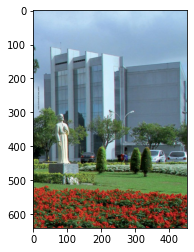

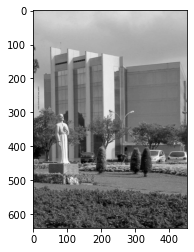

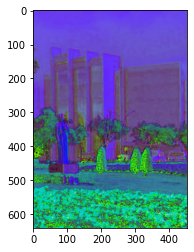

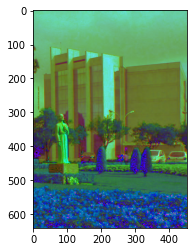

In [3]:
#espaco de cores
img = cv2.imread('./fei.jpeg')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

print('espaco de cores')

plt.imshow(img_rgb,'gray')
plt.show()

plt.imshow(img_gray,'gray')
plt.show()

plt.imshow(img_hsv,'hsv')
plt.show()

plt.imshow(img_hls,'gray')
plt.show()


In [4]:
#black and white conversion
a = img_gray.max()
_, thresh = cv2.threshold(img_gray, a / 2 + 100, a, cv2.THRESH_BINARY_INV)

#preparing kernel
kernel = np.ones((5, 5), np.uint8)

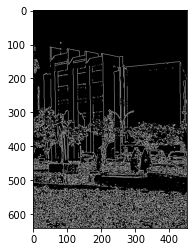

In [5]:
#border detection w/o blurry

edges_gray = cv2.Canny(image=img_gray, threshold1=a/2, threshold2=a/2)
plt.imshow(edges_gray,'gray')
plt.show()


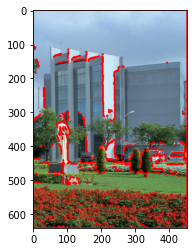

In [6]:
#border detection w blurry

#apply blur filter
img_blur = cv2.blur(img_gray, ksize=(5, 5))

img_open = cv2.morphologyEx(img_blur, cv2.MORPH_OPEN, kernel)
img_close = cv2.morphologyEx(img_open, cv2.MORPH_CLOSE, kernel)

#blurry border detection
edges_gray = cv2.Canny(image=img_close, threshold1=a/1.7 , threshold2=a/1.7)
_, thresh_final = cv2.threshold(edges_gray, a/2*1.7, a,cv2.THRESH_BINARY_INV)

#contour
contours, hierarchy = cv2.findContours(
                                   image = thresh_final,
                                   mode = cv2.RETR_TREE,
                                   method = cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key = cv2.contourArea, reverse = True)
final = cv2.drawContours(img_rgb, contours, contourIdx = -1,
                         color = (255, 0, 0), thickness = 2)

plt.imshow(final,'gray')
plt.show()